## Delvis Burgos
## CSIT 505_01    
## M6: Assignment #2

### ramen_ratings.csv

##### Q1. Make a bar chart that represents the number of ratings each country receives. 

ANSWER TO Q1: 


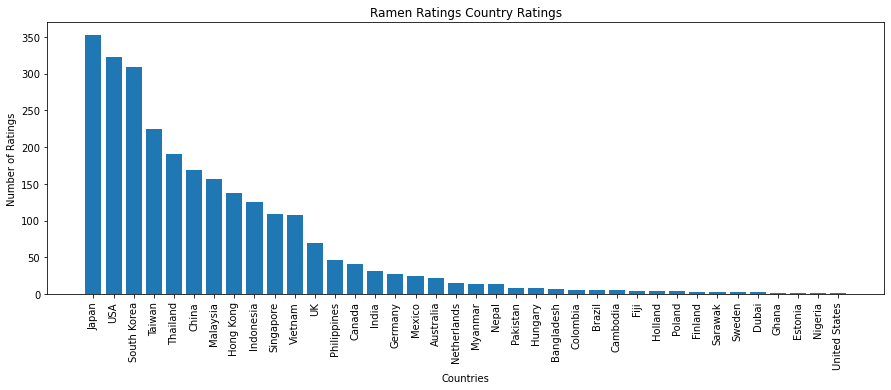

In [434]:
## For Q1:
from matplotlib import pyplot as plt
import pandas as pd 
ramen_rating = pd.read_csv('Users/delvisburgos/Downloads/ramen-ratings.csv')
print("ANSWER TO Q1: ")
country_data = ramen_rating['Country']
country_data = country_data.value_counts()
plt.figure(figsize=(15, 5))
plt.bar(country_data.index, country_data.values)
plt.title("Ramen Ratings Country Ratings")
plt.xlabel("Countries")
plt.ylabel("Number of Ratings")
plt.xticks(rotation='vertical')
plt.show()

##### Q2. Using panda’s groupby() and mean(), find the average rating of each country. Plot the results as a bar chart in descending order of the average ratings. The result should look like this:

ANSWER TO Q2: 


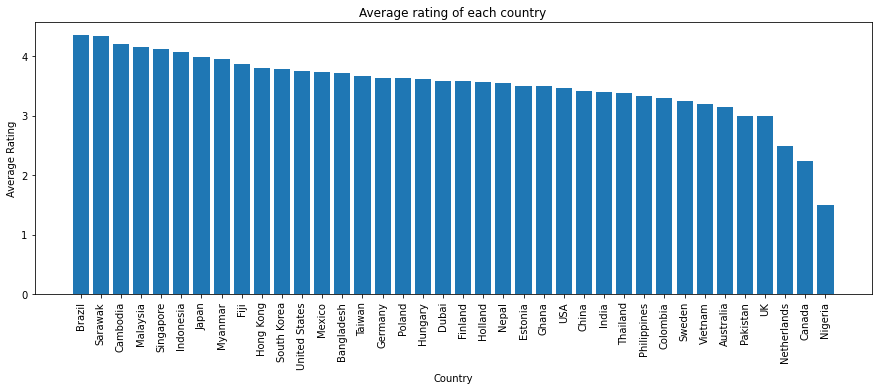

In [105]:
## For Q2:
from matplotlib import pyplot as plt
import pandas as pd 
ramen_rating = pd.read_csv('Users/delvisburgos/Downloads/ramen-ratings.csv')
print("ANSWER TO Q2: ")
ramen_rating = ramen_rating[ramen_rating['Stars'] != 'Unrated']
ramen_rating['Stars']= ramen_rating['Stars'].astype('float')
ramen_rating_avg = ramen_rating.groupby('Country')['Stars'].mean().reset_index().sort_values('Stars', ascending =False)
plt.figure(figsize = (15, 5))
plt.bar(ramen_rating_avg['Country'],ramen_rating_avg['Stars'])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.title("Average rating of each country")
plt.show()

#### Q3. Make a pie chart that shows the percentage of each brand that makes up of all the 5-star ratings. Exclude brands that have less than five 5-star ratings.  In other words, the pie chart should include brands that have been rated 5 star for at least 5 times. The result should look like this:

ANSWER TO Q3: 


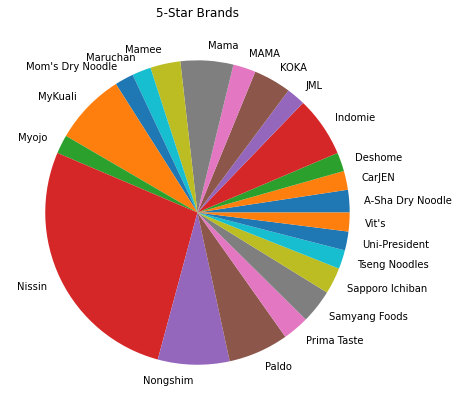

In [463]:
## For Q3:
from matplotlib import pyplot as plt
import pandas as pd 
ramen_rating = pd.read_csv('Users/delvisburgos/Downloads/ramen-ratings.csv')
print("ANSWER TO Q3: ")
ramen_rating_5stars = ramen_rating[ramen_rating['Stars'] == '5']
ramen_rating_5stars = ramen_rating_5stars.groupby('Brand').count()
ramen_rating_5stars = ramen_rating_5stars[ramen_rating_5stars['Stars'] > 4]
ramen_rating_5stars.reset_index(level=0, inplace=True)
fig = plt.figure(figsize =(20, 7))
plt.title('5-Star Brands')
fig.patch.set_facecolor('white')
plt.pie(ramen_rating_5stars['Stars'], labels = ramen_rating_5stars['Brand'])
plt.show()

### netflix_titles.csv
##### Q1. Make a line chart that compares the number of titles of each release year of 5 countries of your choice. You can regard show_id as the unique identifier of a title.

ANSWER FOR Q1
26


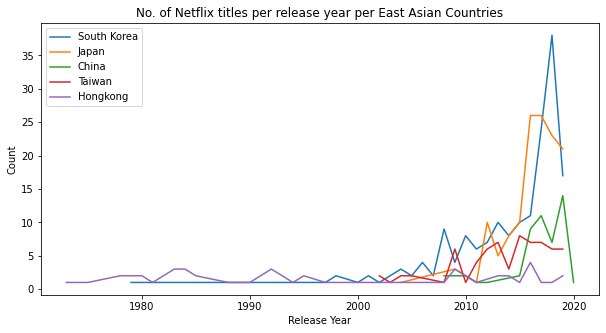

In [453]:
## For Q1:
import matplotlib.pyplot as plt
import pandas as pd
netflix_titles = pd.read_csv('Users/delvisburgos/Downloads/netflix-titles.csv')
print("ANSWER FOR Q1")
netflix_titles.dropna(subset = ['country', 'release_year'])
netflix_titles['country'].drop_duplicates()
netflix_titles['release_year'].drop_duplicates()
netflix_titles = netflix_titles.loc[:, ['release_year','country']]
netflix_titles["country"]= netflix_titles["country"].apply(str)
skorea_dict = dict() 
japan_dict = dict() 
china_dict = dict() 
taiwan_dict = dict() 
hongkong_dict = dict()  

for i in range(1900, 2021):
    s_yearly = 0
    j_yearly = 0
    c_yearly = 0
    t_yearly = 0
    h_yearly = 0
    for j in range(0, len(netflix_titles)):
        if netflix_titles['release_year'][j]==i and netflix_titles['country'][j]=="South Korea": 
            j_yearly += 1
            japan_dict[i]= j_yearly
        if netflix_titles['release_year'][j]==i and netflix_titles['country'][j]=="Japan": 
            s_yearly += 1
            skorea_dict[i]= s_yearly
        if netflix_titles['release_year'][j]==i and netflix_titles['country'][j]=="China": 
            c_yearly += 1
            china_dict[i]= c_yearly
        if netflix_titles['release_year'][j]==i and netflix_titles['country'][j]=="Taiwan": 
            t_yearly += 1
            taiwan_dict[i]= t_yearly
        if netflix_titles['release_year'][j]==i and netflix_titles['country'][j]=="Hong Kong": 
            h_yearly += 1
            hongkong_dict[i]= h_yearly

plt.figure(figsize =(10, 5))
plt.plot(skorea_dict.keys(), skorea_dict.values(), label = "South Korea") 
plt.plot(japan_dict.keys(), japan_dict.values(), label = "Japan") 
plt.plot(china_dict.keys(), china_dict.values(), label = "China")
plt.plot(taiwan_dict.keys(), taiwan_dict.values(), label = "Taiwan")
plt.plot(hongkong_dict.keys(), hongkong_dict.values(), label = "Hongkong")
plt.title('No. of Netflix titles per release year per East Asian Countries')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.show()